# Home Credit Group Dataset Information

## Data Structure Overview

In this data analysis project, we are working with a well-organized dataset comprising multiple CSV files, each fulfilling a specific function and contributing to our overall understanding. These individual files collectively offer a comprehensive perspective on the dataset and facilitate the extraction of valuable insights. Let's delve into these files to better understand their roles.

In [1]:
import pandas as pd
import os
from IPython.display import Image

### Data model

The structure of the data is explained in the following image.

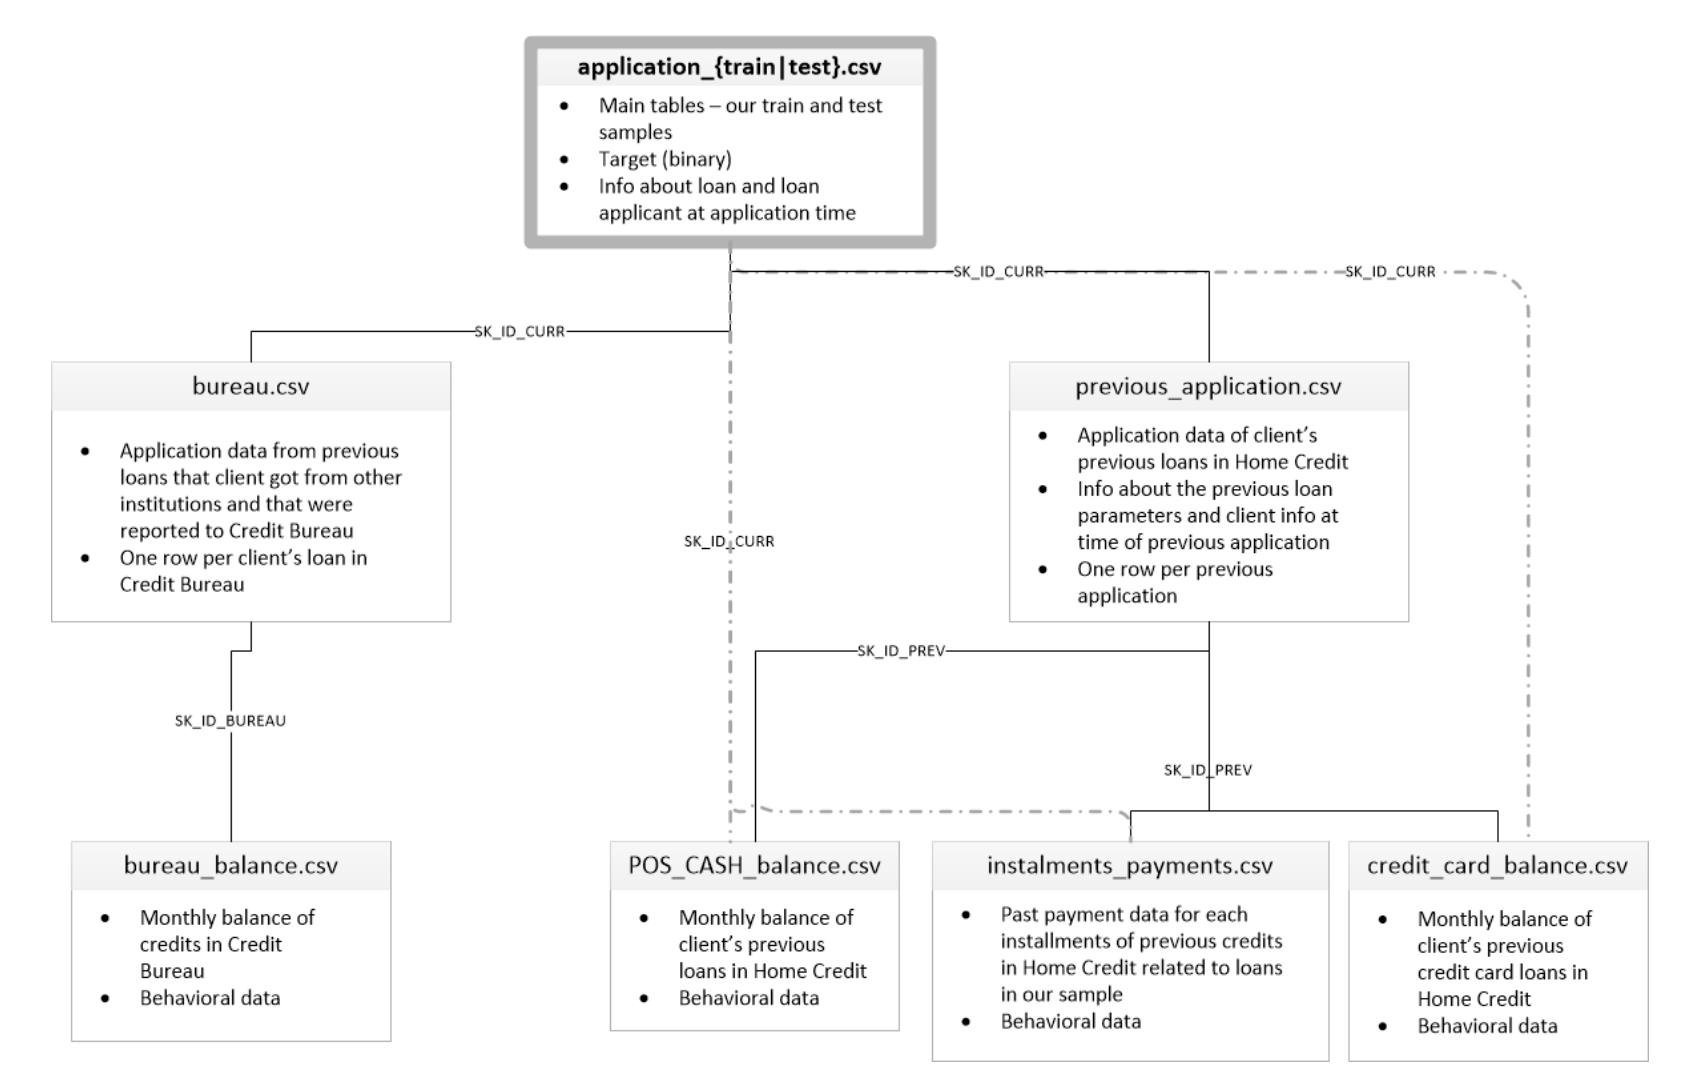

In [2]:
image_path = '../assets/data_structure.png'
Image(filename=image_path)

* **application_train** and **application_test** \
  Contain information about loan and loan applicants at application time. \
  Primary table feature **SK_ID_CURR** links to other tables. \
  **application_train** has the **TARGET** feature and **application_test** has no **TARGET** feature.<br><br>
* **bureau** \
  Contains application data from other loans taken by the client from other credit institutions. \
  This table is linked to **application_train** and **application_test** tables via the **SK_ID_CURR** feature. <br><br>
* **bureau_balance** \
  Contains information about the monthly balances of  previous loans that were reported to  the Credit Bureau. \
  The table is designed to to capture the payment history, providing behavioral data of the loaners. \
  This table is linked to  **bureau** table via the **SK_ID_BUREAU** feature.<br><br>
* **previous_application** \
  Contains information about previous loans at Home Credit by the same client. It includes details about previous loans and client information at the time of those loans. \
  This table is linked to **application_train** and **application_test** tables via the **SK_ID_CURR** feature.<br><br>
* **POS_CASH_balance** \
  Contains monthly balance snapshots of previous point-of-sale (POS) and cash loans that the applicant had with Home Credit. \
  It is connected to **previous_application** through the **SK_ID_PREV** feature. Also it is linked to **application_train** and **application_test** tables via the **SK_ID_CURR** feature. <br><br>
* **credit_card_balance** \
  Contains monthly balance snapshots of previous credit cards that the applicant had with Home Credit. \
  This table gives insights into the payment history and balance of previous credit card accounts. \
  It is connected to **previous_application** through the **SK_ID_PREV** feature. Also it is linked to **application_train** and **application_test** tables via the **SK_ID_CURR** feature. <br><br>
* **installments_payments** \
  Contains repayment history for previously disbursed credits in Home Credit related to the loans in the sample. \
  This table includes information about payments made and missed payments. \
  Each row representts either a payment installment or a missed payment for a previous Home Credit credit. \
  It is connected to **previous_application** through the **SK_ID_PREV** feature. Also it is linked to **application_train** and **application_test** tables via the **SK_ID_CURR** feature. <br><br><br>
Additionally, there is an **HomeCredit_columns_description** file. \
 This file plays a crucial role in our data analysis efforts by offering comprehensive descriptions for the columns present across the various data files. It acts as an indispensable reference document, enabling us to grasp the significance and context of each column, thus enhancing the clarty and effectiveness of our data analysis and interpretation.
   

## Loading the data

In [3]:

data_folder = '../data/original/'

csv_files = [
    'application_test.csv',
    'application_train.csv',
    'bureau.csv',
    'bureau_balance.csv',
    'credit_card_balance.csv',
    'HomeCredit_columns_description.csv',
    'installments_payments.csv',
    'POS_CASH_balance.csv',
    'previous_application.csv',
    'sample_submission.csv'
]

dataframes = {}

for file in csv_files:
    file_path = os.path.join(data_folder, file)
    df_name = file.split('.')[0]
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')


### Shape of the Dataset

In [4]:
for df_name, df in dataframes.items():
    num_rows, num_features = df.shape
    print(f" \n Dataframe: {df_name}")
    print(f"Number of Rows: {num_rows}")
    print(f"Number of Features: {num_features}")

 
 Dataframe: application_test
Number of Rows: 48744
Number of Features: 121
 
 Dataframe: application_train
Number of Rows: 307511
Number of Features: 122
 
 Dataframe: bureau
Number of Rows: 1716428
Number of Features: 17
 
 Dataframe: bureau_balance
Number of Rows: 27299925
Number of Features: 3
 
 Dataframe: credit_card_balance
Number of Rows: 3840312
Number of Features: 23
 
 Dataframe: HomeCredit_columns_description
Number of Rows: 219
Number of Features: 5
 
 Dataframe: installments_payments
Number of Rows: 13605401
Number of Features: 8
 
 Dataframe: POS_CASH_balance
Number of Rows: 10001358
Number of Features: 8
 
 Dataframe: previous_application
Number of Rows: 1670214
Number of Features: 37
 
 Dataframe: sample_submission
Number of Rows: 48744
Number of Features: 2


### Description of the Features

In [5]:
if 'HomeCredit_columns_description' in dataframes:
    description_df = dataframes['HomeCredit_columns_description']

    grouped_descriptions = description_df.groupby('Table')[['Row', 'Description']].apply(lambda x: x.values.tolist())
    
    for table, rows_and_descriptions in grouped_descriptions.items():
        print('-' * 50)
        print(f"Table: {table}")
        print(f"\n")
        for row_and_description in rows_and_descriptions:
            row, description = row_and_description
            print(f" * {row} - {description}")

else:
    print("The 'HomeCredit_columns_description' dataframe is not loaded.")


--------------------------------------------------
Table: POS_CASH_balance.csv


 * SK_ID_PREV  - ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)
 * SK_ID_CURR - ID of loan in our sample
 * MONTHS_BALANCE - Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )
 * CNT_INSTALMENT - Term of previous credit (can change over time)
 * CNT_INSTALMENT_FUTURE - Installments left to pay on the previous credit
 * NAME_CONTRACT_STATUS - Contract status during the month
 * SK_DPD - DPD (days past due) during the month of previous credit
 * SK_DPD_DEF - DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit
--------------------------------------------------
Tab

### Missing Values in the Dataset

In [18]:
dataframes_info = []

for df_name, df in dataframes.items():
    total_cells = df.size
    missing_cells = df.isnull().sum().sum()
    missing_percentage = (missing_cells / total_cells) * 100
    
    df_info = pd.DataFrame({
        'DataFrame Name': [df_name],
        'Total Values': [total_cells],
        'Missing Values': [missing_cells],
        'Missing Values %': [round(missing_percentage, 2)]
    })
    
    dataframes_info.append(df_info)

result_df = pd.concat(dataframes_info, ignore_index=True)
result_df = result_df.sort_values(by='Missing Values %', ascending=False)

result_df

,DataFrame Name,Total Values,Missing Values,Missing Values %
1,application_train,37516342,9152465,24.40
0,application_test,5898024,1404419,23.81
8,previous_application,61797918,11109336,17.98
2,bureau,29179276,3939947,13.50
5,HomeCredit_columns_description,1095,133,12.15
4,credit_card_balance,88327176,5877356,6.65
7,POS_CASH_balance,80010864,52158,0.07
6,installments_payments,108843208,5810,0.01
3,bureau_balance,81899775,0,0.00
9,sample_submission,97488,0,0.00


In conclusion, this initial look provides insights into the extent of missing data across different datasets. Further exploratory data analysis (EDA) will be conducted to gain deeper insights and determine appropriate strategies for handling missing values.